In [ ]:
import pandas as pd  # Importing necessary libraries for data analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Movie_regression.csv.", header=0) # Reading the dataset from the CSV file

In [4]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

### Missing Value Imputation

In [ ]:
df['Time_taken'].mean()  # 'Time_taken' column ka mean calculate karna (average value nikalna)


np.float64(157.3914979757085)

In [ ]:
df['Time_taken'] = df['Time_taken'].fillna(df['Time_taken'].mean())  
# 'Time_taken' column ki missing values ko mean se fill karna

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

Dummy Variable Creation

In [13]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,True,False,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,False,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,False,True,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,True,False,True,False
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,False,False,True,False


In [ ]:
df = pd.get_dummies(df,columns = ["3D_available","Genre"],drop_first = True)
# '3D_available' aur 'Genre' columns ke dummy variables create karna (one-hot encoding), pehla category drop kar ke


In [14]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,True,False,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,False,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,False,True,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,True,False,True,False
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,False,False,True,False


 X-y split

In [ ]:
X = df.loc[:,df.columns!="Collection"] # Features (X) aur target variable (y) ko split karna, 'Collection' column ko X se exclude kar ke
type(X)

pandas.core.frame.DataFrame

In [16]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,True,False,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,False,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,False,True,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,True,False,True,False
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,False,False,True,False


In [17]:
X.shape

(506, 19)

In [ ]:
y = df["Collection"] # Target variable (y) ko select karna, 'Collection' column ko y me assign kar ke
type(y)

pandas.core.series.Series

In [20]:
y.head()

0    48000
1    43200
2    69400
3    66800
4    72400
Name: Collection, dtype: int64

In [21]:
y.shape

(506,)

### Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split
# Train aur test data ko split karne ke liye function import karna


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)
# Data ko train aur test sets me split karna (80% train, 20% test), random_state reproducibility ke liye


In [24]:
X_train.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,False,False,False,True
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,False,False,False,False
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,True,True,False,False
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,True,False,False,True
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,True,False,False,False


In [25]:
X_train.shape

(404, 19)

In [26]:
X_test.shape

(102, 19)

### Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler
# Data ko standardize karne ke liye StandardScaler import karna


In [ ]:
sc = StandardScaler().fit(X_train) # Training data ko standardize karne ke liye scaler fit karna



In [ ]:
X_train_std = sc.transform(X_train) # Training features ko standardize karna (mean=0, std=1)


In [ ]:
X_test_std = sc.transform(X_test) # Test features ko standardize karna (mean=0, std=1, training scaler se)



In [32]:
X_test_std

array([[-0.40835869, -1.12872913,  0.83336883, ...,  1.50268577,
        -0.48525664, -0.75225758],
       [ 0.71925111,  0.9988844 , -0.65283979, ...,  1.50268577,
        -0.48525664, -0.75225758],
       [-0.40257488,  0.39610829,  0.05115377, ...,  1.50268577,
        -0.48525664, -0.75225758],
       ...,
       [-0.3982601 , -0.85812418,  0.89420778, ..., -0.66547513,
        -0.48525664,  1.3293319 ],
       [-0.39934279, -0.07637654,  0.58132175, ...,  1.50268577,
        -0.48525664, -0.75225758],
       [-0.40088071, -0.36702631,  0.31189212, ..., -0.66547513,
        -0.48525664, -0.75225758]])

In [33]:
X_test

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
329,21.3448,61.48,0.540,35179.815,90.7,7.320,7.460,7.275,7.515,8.62,483051,111.040000,283.616,53,452,False,True,False,False
371,204.6460,91.20,0.369,34529.880,173.5,9.310,9.525,9.320,9.505,7.96,454281,196.000000,268.000,25,609,True,True,False,False
219,22.2850,82.78,0.450,35402.015,165.9,8.175,8.375,8.315,8.405,8.72,451935,123.200000,263.680,21,561,True,True,False,False
403,516.0340,91.20,0.307,29713.695,169.5,9.125,9.310,9.060,9.100,6.96,384237,157.391498,301.328,40,677,True,False,False,True
78,21.1292,80.66,0.563,34618.760,127.2,7.330,7.500,7.450,7.690,8.26,447528,176.480000,303.392,53,377,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,20.4110,56.48,0.590,35457.565,109.2,5.340,5.535,5.285,5.465,8.54,539589,115.880000,303.952,22,383,True,False,True,False
455,115.0474,91.20,0.287,36246.375,160.0,8.695,8.790,8.630,9.015,6.96,408819,155.640000,282.256,36,620,False,False,False,True
60,22.9864,65.26,0.547,31891.255,139.7,6.335,6.420,6.235,6.560,7.06,465689,157.391498,222.992,30,439,False,False,False,True
213,22.8104,76.18,0.511,35413.125,105.8,7.945,8.040,7.910,8.215,7.28,504226,151.240000,204.496,3,441,True,True,False,False


### Training Regression Model

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='linear', C = 3000)
# SVM regression model ko import aur initialize karna (linear kernel, C=3000)


In [35]:
svr.fit(X_train_std, y_train)

SVR(C=3000, kernel='linear')

Predict values using trained model

In [36]:
y_test_pred = svr.predict(X_test_std)
y_train_pred = svr.predict(X_train_std)

In [37]:
y_test_pred


array([54149.04985486, 42108.34471213, 47533.48916049, 17335.56708281,
       48583.82292106, 39306.44775798, 33505.95357258, 43171.76493611,
       29476.26499757, 46980.75731106, 12645.08472005, 38648.42247606,
       38048.23936643,  8415.03656142, 67457.69091146, 62224.20392735,
       38975.54675177, 65880.00221638, 56742.36900526, 42713.82149416,
       53525.49453611, 39264.62422239, 41193.0722557 , 58209.33323514,
       42495.88201229, 12132.62441558, 40418.388771  , 29850.91523035,
       75048.60074289, 43839.06117388, 36786.86517155, 37330.36790836,
       37565.19845687, 40538.47149965, 51853.98917488, 35081.953653  ,
       25483.31757367, 36025.27585635, 36413.96001027, 36164.40005116,
       47058.89224017, 45705.5529832 , 44210.84051283, 27455.32262479,
       50732.91083481, 46541.46433882, 32853.69351742, 40270.99818317,
       15510.5314676 , 52029.40170025, 41465.42768857, 38769.99820303,
       47214.74691351, 68388.92527652, 25170.79907636, 41175.69832862,
      

Model Performance

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
mean_squared_error(y_test, y_test_pred)

np.float64(161383675.9579183)

In [40]:
r2_score(y_train, y_train_pred)

0.7110100333340452

In [41]:
r2_score(y_test, y_test_pred)

0.4986911236414351

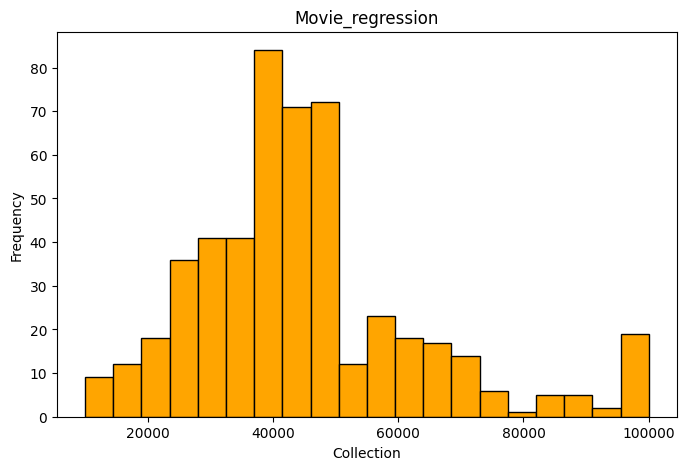

In [43]:
plt.figure(figsize=(8,5))
plt.hist(df['Collection'], bins=20, color='orange', edgecolor='black')
plt.title('Movie_regression')
plt.xlabel('Collection')
plt.ylabel('Frequency')
plt.show()

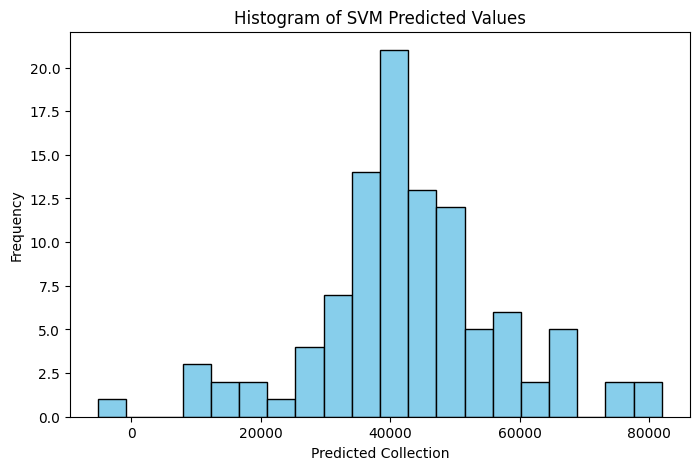

In [44]:
plt.figure(figsize=(8,5))
plt.hist(y_test_pred, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of SVM Predicted Values')
plt.xlabel('Predicted Collection')
plt.ylabel('Frequency')
plt.show()